<a href="https://colab.research.google.com/github/nishant123456767/AirBnb-EDA-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## <b> Importing libraries</b>

In [1]:
# importing all libraries required in the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## <b>Loading the dataset</b>

In [2]:
# Mounting google colab drive to get acess of the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading data through pandas libraries
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 1/AirBnb EDA Project/Airbnb NYC 2019.csv')

## <b> Describing the data</b>

In [4]:
# Cheking the dataset fromation or shape of the data
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Checking all the columns involved in the column
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
# Descrbing the standards of the data like (min, max, standard deviation)
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* From this we can see the mean price to be around 152 .

*  Average minimum nights spends by a person is 7 days.

* Average number of reviews given by a person is 23.

* Average reviews per month is almost 1.

* Average availablity of an airbnb around a year is 112 days.

In [7]:
# Checking the information regarding the data eg. data, values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

* As we can see that there are some null values in the data set column host_name, name, reviews per month and last review.

In [8]:
data.shape

(48895, 16)

# Data cleaning and wrangling

In [9]:
# Droping id column because it is having no impact on the dataset
data.drop('id', axis = 1, inplace  = True)

In [10]:
# Checking the all the null values in the columns
data.isna().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# Cheking the most occuring values(Michael) in the host name column or calculating mean of the column
data['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [12]:
# Cheking the most occuring values in the name column(Hillside Hotel) or calculating mean of the column
data['name'].value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

In [13]:
# Replacing the null values with mode of that column 
data.fillna({'host_name':'Michael','name':'Hillside Hotel'},inplace=True)

In [14]:
# As we can see that there are no duplicate rows in the column
data.duplicated().sum()

0

In [15]:
# Checking the last review column as they are having 10052 null values
data['last_review']

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [16]:
# Checking the reviews per month column as they are having 10052 null values
data['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [17]:
# Checking the reviews per month column as they are having 10052 null values
data['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

# <b>Exploratory data analysis</b>

## EDA on room type

In [18]:
# Cheking values in the room type columns
data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

# From this graph we can see that home and apartments are more avilable as as comaperd to private room but shared room are very less avilable as compared to private room and apartments.

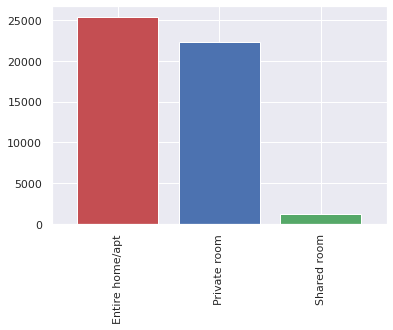

In [19]:
# Using bar plot to check the count of the room type 
data['room_type'].value_counts().plot(kind='bar',color=['r','b','g'], width=0.8)
plt.show()

## In the bar graph below we can see the shared room are more avilable more as compared to other rooms(private and apartments)

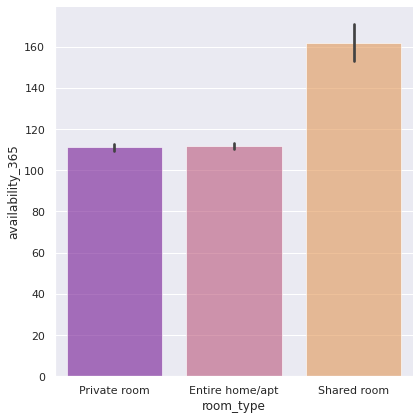

In [20]:
graph = sns.catplot(data=data, kind="bar", x="room_type", y="availability_365", palette="plasma", alpha=.6, height=6)

## The price of the aprtments are the highest, then private room and the shared rooms is least

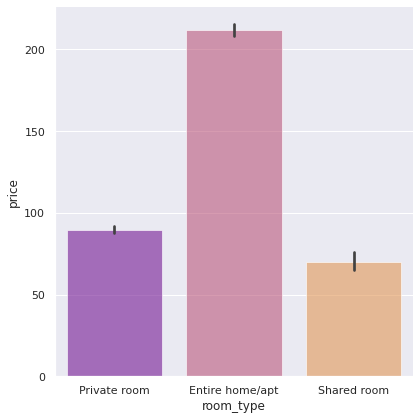

In [21]:
g = sns.catplot(
    data=data, kind="bar",
    x="room_type", y="price", palette="plasma", alpha=.6, height=6
)

## The minimum nights in aprtments are the highest, then shared room and the private rooms is least

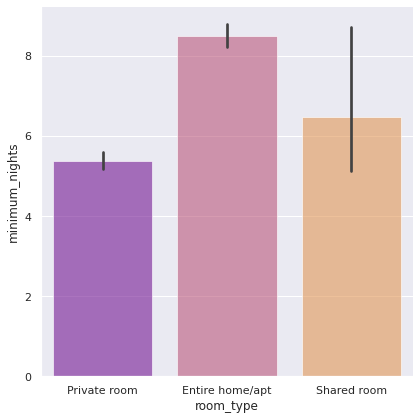

In [22]:
g = sns.catplot(
    data=data, kind="bar",
    x="room_type", y="minimum_nights", palette="plasma", alpha=.6, height=6
)

## The number reviews given by private rooms are more as comapred to apartmentes because people stayed less in these rooms and number for shared rooms is least

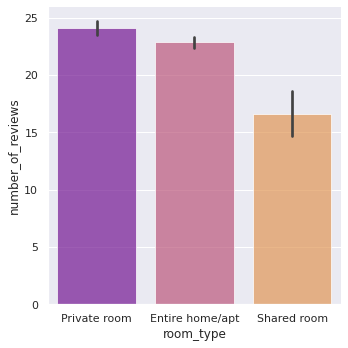

In [23]:
g = sns.catplot(
    data=data, kind="bar",
    x="room_type", y="number_of_reviews", palette="plasma", alpha=.7, height= 5
)


## EDA on the bases of host name

In [24]:
private = data[data['room_type']=='Private room']
list_private = private.groupby(['host_name','neighbourhood']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)

,host_name,neighbourhood,private
6603,John,Hell's Kitchen,47
7391,Kazuya,Woodside,35
4356,Eyal,Upper West Side,32
4689,Gabriel,Hell's Kitchen,31
10345,Nina,Bedford-Stuyvesant,28
14042,Zach,Fort Greene,26
14015,Yuval,Ridgewood,23
9540,Michael,Williamsburg,22
11915,Sarah,Williamsburg,22
4200,Erin,Chelsea,20


## The host name Max have the most shared room's i.e 23

In [25]:
private = data[data['room_type']=='Shared room']
list_private = private.groupby(['host_name','neighbourhood']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
list_private.head(10)

,host_name,neighbourhood,shared
451,Max,Lower East Side,23
622,Sergii,Bushwick,20
461,Melissa,Bedford-Stuyvesant,18
47,Anchor,Bedford-Stuyvesant,17
225,Gúney,Hell's Kitchen,11
79,Baboucarr,Sunnyside,10
6,Abraham,East Harlem,9
198,Erik,Hell's Kitchen,9
288,Jess & Ana,Corona,8
531,Orit,Port Morris,8


## The host name Sonder (NYC) have the most aprtments room's i.e 210

In [26]:
private = data[data['room_type']=='Entire home/apt']
list_private = private.groupby(['host_name','neighbourhood']).size().reset_index(name='Entire home/apt').sort_values(by=['Entire home/apt'],ascending=False)
list_private.head(10)

,host_name,neighbourhood,Entire home/apt
15502,Sonder (NYC),Financial District,210
16961,Vida,Greenpoint,52
15497,Sonder,Financial District,51
15505,Sonder (NYC),Murray Hill,50
13841,Red Awning,Midtown,49
15625,Stanley,Murray Hill,49
8734,Kara,Hell's Kitchen,41
2188,Blueground,Chelsea,37
17273,Yaacov,Upper East Side,33
8737,Kara,Midtown,33


##  Finding potential relationships between variables and to understand the strength of these relationships.
1. Values closer to zero means there is no linear trend between the two variables.
2. The value close to 1 the correlation is the more positively correlated they are that is as one increases so does the other and the closer to 1 the stronger this relationship is.# New Section

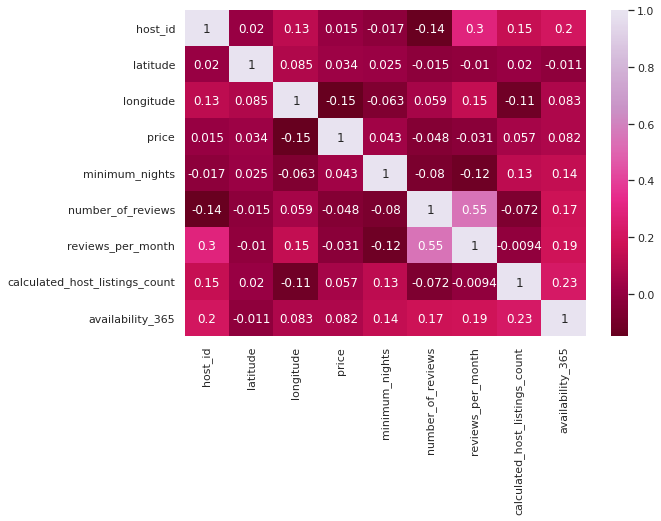

In [27]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data.corr(),annot=True,center = .5 , cmap ='PuRd_r',ax=ax)
plt.show()

# EDA on the bases of neighbourhood_group

In [28]:
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

# Neighbourhood group manhanttan have the most room and Staten Island have the least value

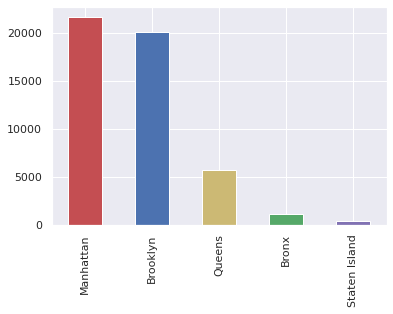

In [29]:
data['neighbourhood_group'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
plt.show()

# The group with high number of neighbourhood group are having more costly room's and less room are having less price excpet Staten Island

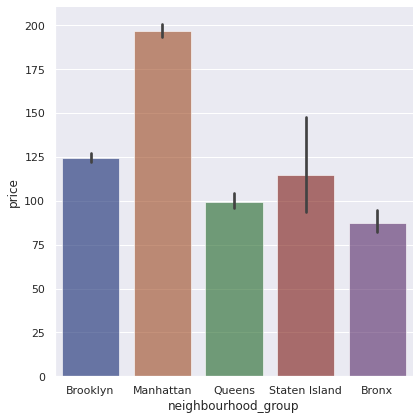

In [30]:
g = sns.catplot(
    data=data, kind="bar",
    x="neighbourhood_group", y="price", palette="dark", alpha=.6, height=6
)

# The Staten Island is having the most avilable rooms throughout the year and brooklyn is having the least avilable (maybe because high number of customer)

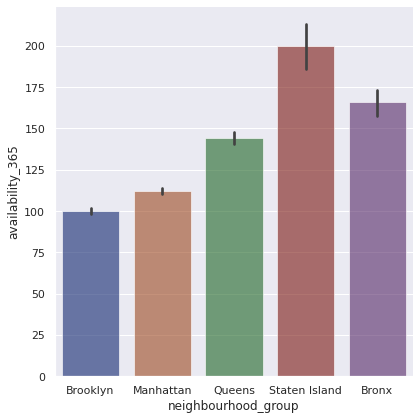

In [31]:
g = sns.catplot(
    data=data, kind="bar",
    x="neighbourhood_group", y="availability_365", palette="dark", alpha=.6, height=6
)

# In the below graph we can see that the Staten Island is the most avilable room of all neighbour hood group and brooklyn is the brooklyn have the least

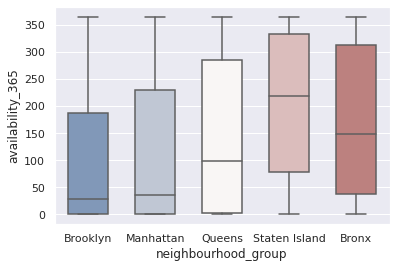

In [32]:
sns.boxplot(x="neighbourhood_group", y="availability_365", data=data,
            whis=[0, 100], width=.6, palette="vlag")

# The reviews for the Queens and Staten Island are the most and Manhattan is the least 

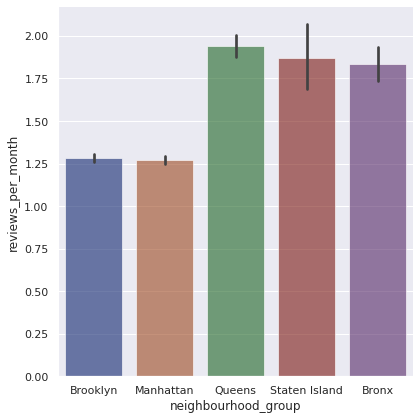

In [33]:
g = sns.catplot(
    data=data, kind="bar",
    x="neighbourhood_group", y="reviews_per_month", palette="dark", alpha=.6, height=6
)

# All the room's get almost same type of reviews just having minor differnence

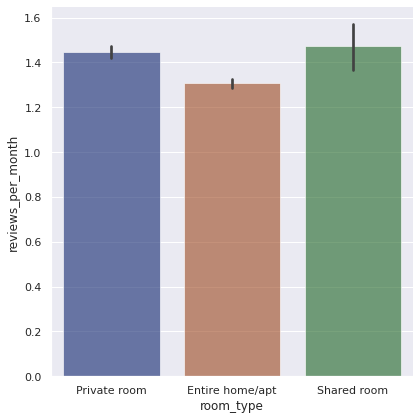

In [34]:
g = sns.catplot(
    data=data, kind="bar",
    x="room_type", y="reviews_per_month", palette="dark", alpha=.6, height=6
)

# Staten Island is having the least shared room and Manhatten is having the most expensive rooms i.r home/apt.

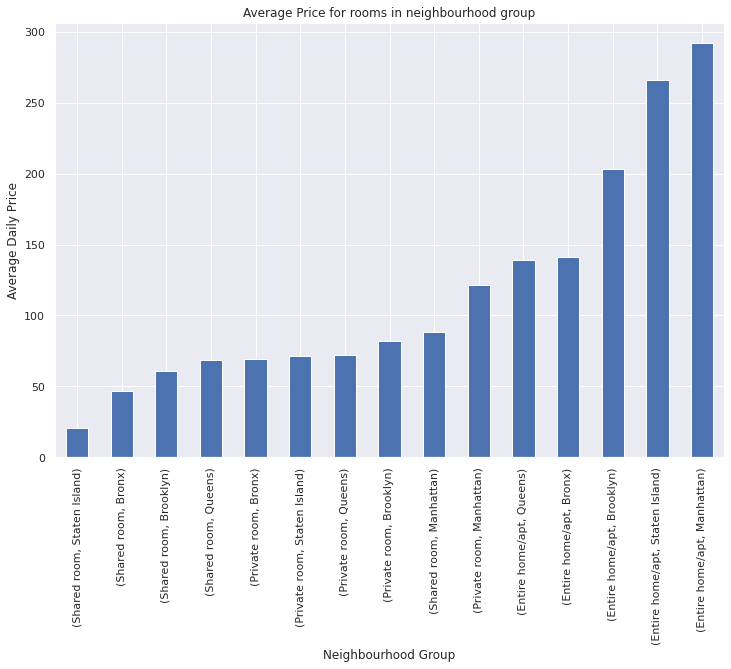

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [35]:
data.head()
plt.figure(figsize=(12,8))
df = data[data['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

# Most of the price of rooms is below 2000

# EDA for price distribution

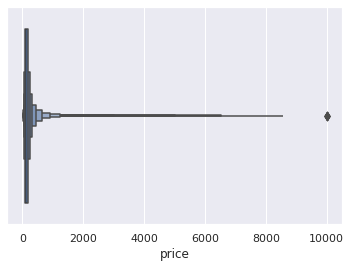

In [36]:
figsize=(12,8)
sns.boxenplot(x='price',data=data)

# As we can see that the most of the price is below the range of 2000 and the highest price for the hotel is 10000 for 3 hotels and among which one avilable all the time and one is not avilable all the time for some reason and one is avilable at some time and not avilable some time

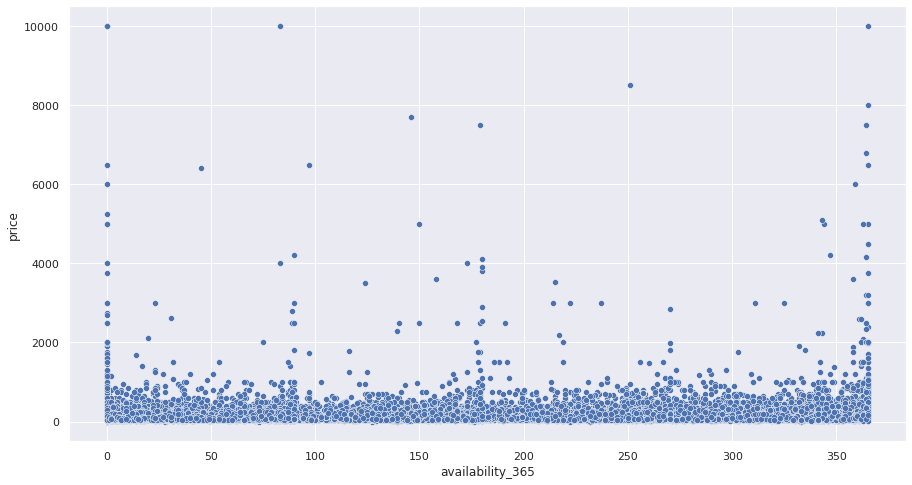

In [37]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=data['price'],x=data['availability_365'])

                                price
neighbourhood                        
Bath Beach                  81.764706
Bay Ridge                  144.432624
Bedford-Stuyvesant         107.678244
Bensonhurst                 75.786667
Bergen Beach               106.700000
Boerum Hill                176.135593
Borough Park                63.066176
Brighton Beach             131.933333
Brooklyn Heights           209.064935
Brownsville                 76.459016
Bushwick                    84.800406
Canarsie                   104.367347
Carroll Gardens            175.914163
Clinton Hill               181.893357
Cobble Hill                211.929293
Columbia St                162.952381
Coney Island               123.705882
Crown Heights              112.480179
Cypress Hills              128.903704
DUMBO                      196.305556
Downtown Brooklyn          150.349398
Dyker Heights               93.416667
East Flatbush              104.222000
East New York               85.426606
Flatbush    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


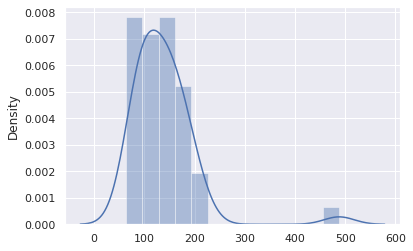

In [38]:
df1 = data[data.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
print(d)
sns.distplot(d)
plt.show()

## <b> What can we learn about different hosts and areas?

* Predications = Host name Sonder (NYC) from	Financial District	have the most accomdation(Home and Apartmenets) i.e 210 for all other private(47) and shared rooms(23)
</b>


* <b>The Staten Island is having the most avilable rooms throughout the year and brooklyn is having the least avilable</b>

## <b> What can we learn from predictions? (ex: locations, prices, reviews, etc)</b>

<b>Predications</b> = The room avilable in different locations are:
* 1. <b>Manhattan</b>     = 21661
  2. <b>Brooklyn</b>      = 20104
  3. <b>Queens</b>        = 5666
  4. <b>Bronx</b>         = 1091
  5. <b>Staten Island</b> = 373

* <b> The group with high number of neighbourhood group(Manhattan) are having more costly room's and less room are having less price excpet Staten Island</b>
* <b>The Staten Island is having the most avilable rooms throughout the year and brooklyn is having the least avilable</b>

## <b>Price with respect to avilabilty through out the year</b>
* <b>As we can see that the most of the price is below the range of 2000 and the highest price for the hotel is 10000 for 3 hotels and among which one avilable all the time and one is not avilable all the time for some reason and one is avilable at some time and not avilable some time.</b>

## <b>Reviews with respect to room type and neighbourhood</b>
* <b>All the room's get almost same type of reviews just having minor differnence</b>

* <b>The reviews for the Queens and Staten Island are the most and Manhattan is the least</b>

## <b> Which hosts are the busiest and why?</b>


## <b>Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>